### 문제정의
- hr 데이터를 통해 사내 이직률 확인
- 직원의 이직여부 판단 -> 정보가 없는 직원의 이직률 하락
- 이직률과 연관이 있는 사항들을 지속적으로 모니터링, 개선

In [1]:
# warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
# 데이터 불러오기
data = pd.read_csv('data/job_transfer.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# 데이터 정보확인
data.info()
# 1. Dtype 2. Non-Null -> 결측치 여부 확인
# 결측치 없음 확인!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

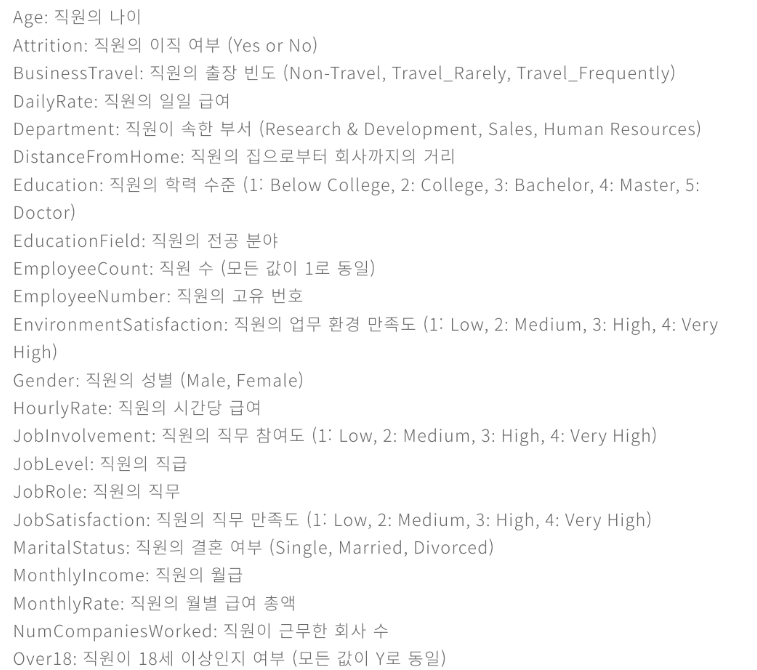

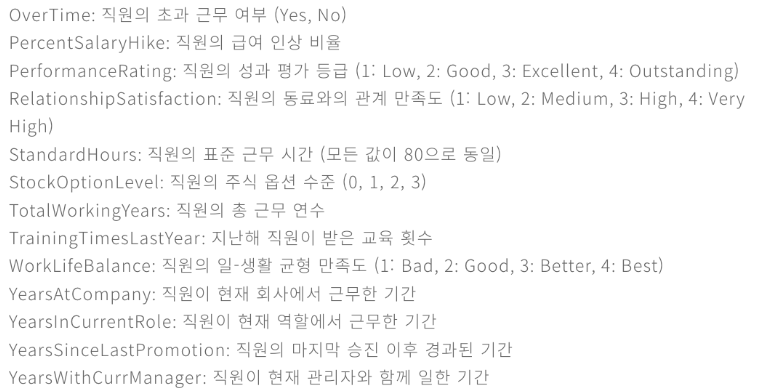

### EDA(탐색적 데이터 분석)

In [4]:
# 직원들의 이직여부 확인
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [5]:
# 우리 회사의 이직률 확인
# 이직자수/ 전체수 *100
237/(237+1233)*100
# 약 16%의 이직률

16.122448979591837

In [6]:
# 정답데이터 -> Attrition(이직여부) -> 숫자 데이터
# 이직한 사람 -> 1, 이직하지 않은 사람 -> 0 중요 클래스를 1로 바꾸는게 좋음.
import numpy as np
# np.where(조건, 조건에 부합하는 데이터 변경, 나머지 데이터 변경), 양성을 1로 함.
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)

In [7]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
# 연령데이터 확인
data['Age'].value_counts()
# 연속적인 데이터 카테고리화하여 데이터의 특징을 부각

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

In [9]:
# 연령데이터 3개의 카테고리로 묶어주기(구간화)
# 30대 이하, 30-40, 40대 이상
# np.where(조건, 조건에 부합하는 데이터 변경, 나머지 데이터 변경)
data["Age_gp"]= np.where(data['Age'] <=30, '30 이하',np.where(data['Age'] < 40, '30-40','40대 이상'))

In [10]:
data['Age']

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [11]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,30-40
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,30-40
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,30 이하
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,30-40
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,30-40
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,30 이하
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,40대 이상


In [12]:
### 연령대별 이직률 확인
# 이직률 = 이직자 / 전체수 * 100
# 공식 :  30대 이하 이직률 = 30대 이하 이직자 (Attrition sum) / 30대 이하 사람수 (Attrition count)
df_gb = data.groupby('Age_gp')['Attrition'].agg(['sum','count'])
df_gb['ratio'] = round(df_gb['sum']/df_gb['count']*100,1)
df_gb
# 연령대가 어릴수록 이직률이 높은 것을 확인

,sum,count,ratio
Age_gp,,,
30 이하,100,386,25.9
30-40,80,562,14.2
40대 이상,57,522,10.9


In [13]:
# 성별에 따른 이직률 현황
# 성별 컬럼 : 'Gender'
# data['Gender'].unique()
df_gender = data.groupby('Gender')['Attrition'].agg(['count','sum'])
df_gender['ratio'] = round(df_gender['sum']/df_gender['count']*100,1)
df_gender
# 여성보다는 남성의 이직률이 조금 더 높은 것을 확인

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [14]:
# 부서별 이직률 현황
# 부서 컬럼 : department
data['Department'].unique()
df_depart = data.groupby('Department')['Attrition'].agg(['count','sum'])
df_depart['ratio'] = round(df_depart['sum']/df_depart['count']*100,1)
df_depart

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


### 가설1 : 업무만족도는 높으나 인간관계로 인한 이직률이 높을 것이다.

In [15]:
# 인간관계 만족도와 업무만족도의 상관관계 확인
# 인간관계 만족도 : RelationshipSatisfaction, 업무만족도 : JobSatisfaction
# 숫자가 클수록 만족!
data[['RelationshipSatisfaction','JobSatisfaction','Attrition']].head()

,RelationshipSatisfaction,JobSatisfaction,Attrition
0,1,4,1
1,4,2,0
2,2,3,1
3,3,3,0
4,4,2,0


In [16]:
# 업무 만족도별 이직률 현황
data['JobSatisfaction'].unique()
df = data.groupby('JobSatisfaction')['Attrition'].agg(['sum','count'])
df['ratio'] = round(df['sum']/df['count']*100 ,1)
df
# 업무만족도가 낮을수록 이직률이 높다!

,sum,count,ratio
JobSatisfaction,,,
1,66,289,22.8
2,46,280,16.4
3,73,442,16.5
4,52,459,11.3


In [17]:
# 인간관계 만족도별 이직률 현황
df = data.groupby('RelationshipSatisfaction')['Attrition'].agg(['sum','count'])
df['ratio'] = round(df['sum']/df['count']*100 ,1)
df
# 인간관계 만족도가 낮을수록 이직률이 높다!

,sum,count,ratio
RelationshipSatisfaction,,,
1,57,276,20.7
2,45,303,14.9
3,71,459,15.5
4,64,432,14.8


In [18]:
# 인간관계, 업무만족도 두 컬럼의 관계 확인
df = data.groupby(['JobSatisfaction','RelationshipSatisfaction'])['Attrition'].agg(['sum','count'])
df['ratio'] = round(df['sum']/df['count']*100,1)
df
# 결과 해석
# 업무만족도가 높은 직원은 인간관계에 따른 이직률 변동이 적다(영향을 덜 받음)
# 업무만족도가 낮은 직원은 이직률에 인간관계 영향력 큰 것 확인.

# 우리의 가설 : 업무만족도는 높으나 인간관계로 인한 이직률이 높을 것이다.
# 우리의 가설이 잘못 설정 -> 가설 수정 -> 결과 확인
# 업무만족도가 이직률에 미치는 영향이 더 높구나 -> 직원들의 업무만족도 향상을 위해 힘쓸 것!

sum  count  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                          16     54   29.6
                2                          15     57   26.3
                3                          22     91   24.2
                4                          13     87   14.9
2               1                          15     53   28.3
                2                           8     57   14.0
                3                          13     81   16.0
                4                          10     89   11.2
3               1                          16     85   18.8
                2                          11     94   11.7
                3                          19    133   14.3
                4                          27    130   20.8
4               1                          10     84   11.9
                2                          11     95   11.6
                3                          17    154   11.0
                4                          14    126   11.1

#### 가설2) 근속년수 대비 같은 업무를 한 비중이 높다면 이직률이 높을 것이다.

In [19]:
# YearsInCurrentRole: 현재 역할에서 근무한 기간
# YearsAtCompany : 현재까지 근무한 기간
data[['YearsInCurrentRole','YearsAtCompany','Attrition']]

,YearsInCurrentRole,YearsAtCompany,Attrition
0,4,6,1
1,7,10,0
2,0,0,1
3,7,8,0
4,2,2,0
...,...,...,...
1465,2,5,0
1466,7,7,0
1467,2,6,0
1468,6,9,0


In [20]:
# 근속년수 대비 한가지 업종에서 일한 비중
data['Role_Company'] = data['YearsInCurrentRole']/data['YearsAtCompany']
data['Role_Company'].fillna(0, inplace = True) # 결측치인 값을 원하는 값인 0으로 채워줌
data['Role_Company']

0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: Role_Company, Length: 1470, dtype: float64

In [21]:
import seaborn as sns

<Axes: xlabel='Role_Company', ylabel='Density'>

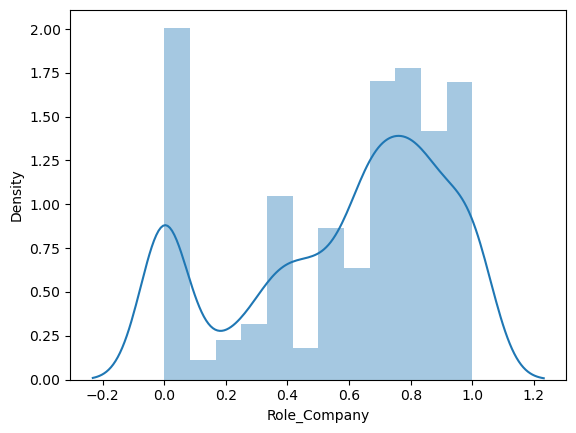

In [22]:
# Role_Company 분포 확인
# distplot : 데이터의 분포를 확인하는데 주로 사용됨. 
# 히스토그램과 커널밀도추정을 함께 그려서 데이터의 분포를 확인
sns.distplot(data['Role_Company'])

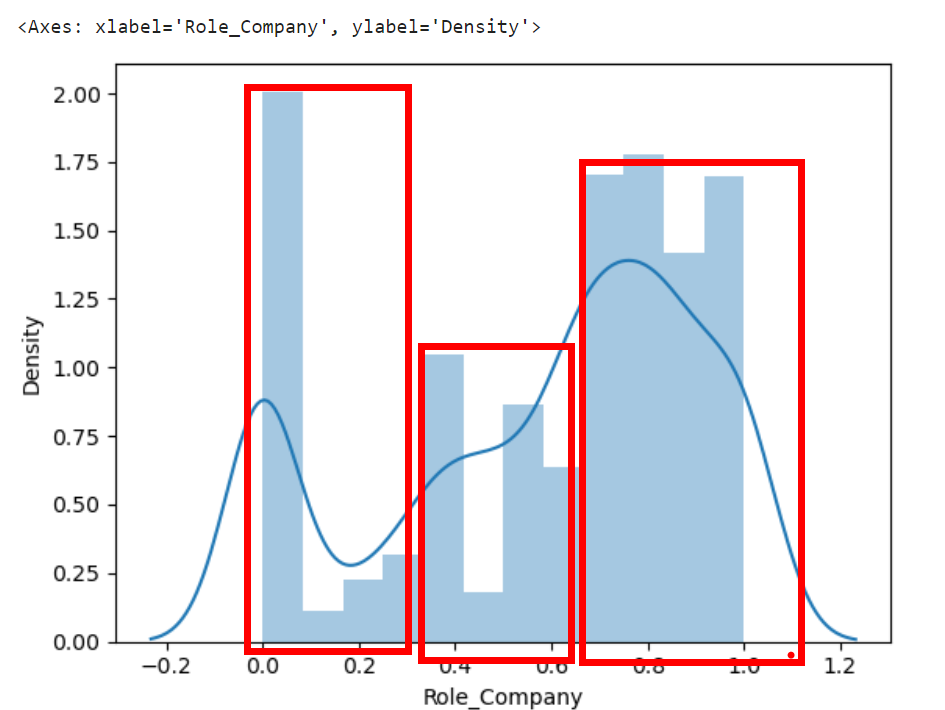

In [23]:
# 카테고리화
# np.where()
# '0.3이하', '0.3-0.6', '0.6 초과'
# Role_Company_gp

In [24]:
data["Role_Company_gp"]= np.where(data['Role_Company'] <=0.3, '0.3이하',np.where(data['Role_Company'] <= 0.6, '0.3-0.6','0.6 초과'))

In [25]:
data[['Role_Company','Role_Company_gp']]

,Role_Company,Role_Company_gp
0,0.666667,0.6 초과
1,0.700000,0.6 초과
2,0.000000,0.3이하
3,0.875000,0.6 초과
4,1.000000,0.6 초과
...,...,...
1465,0.400000,0.3-0.6
1466,1.000000,0.6 초과
1467,0.333333,0.3-0.6
1468,0.666667,0.6 초과


In [26]:
df

sum  count  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                          16     54   29.6
                2                          15     57   26.3
                3                          22     91   24.2
                4                          13     87   14.9
2               1                          15     53   28.3
                2                           8     57   14.0
                3                          13     81   16.0
                4                          10     89   11.2
3               1                          16     85   18.8
                2                          11     94   11.7
                3                          19    133   14.3
                4                          27    130   20.8
4               1                          10     84   11.9
                2                          11     95   11.6
                3                          17    154   11.0
                4                          14    126   11.1

In [27]:
# 근속년수 대비 같은 일을 오래 한 사람들의 이직률
df = data.groupby('Role_Company_gp')['Attrition'].agg(['sum','count'])
df['ratio'] = round(df['sum'] / df['count']*100 , 1)
df.loc[['0.3이하','0.3-0.6','0.6 초과']]
# 근속년수 대비 같은 일을 짧게 한 사람일 수록 이직률이 높은 것!
# 가설 수정 -> 근속년수 대비 한 업무를 길게 할 수 있도록 권장

,sum,count,ratio
Role_Company_gp,,,
0.3이하,89,323,27.6
0.3-0.6,38,321,11.8
0.6 초과,110,826,13.3


### 가설3) 야근을 많이 해도 급여인상률이 높다면 이직률이 낮을 것이다!

In [28]:
# 야근 여부에 따른 이직률 현황
# OverTime

data['OverTime'].unique()
df_overtime = data.groupby('OverTime')['Attrition'].agg(['sum','count'])
df_overtime['ratio'] = round(df_overtime['sum']/df_overtime['count']*100 ,1)
df_overtime
# 야근을 많이 한 사람은 이직률이 높음

,sum,count,ratio
OverTime,,,
No,110,1054,10.4
Yes,127,416,30.5


In [29]:
# 연봉 인상률에 따른 이직률 현황
# PercentSalaryHike
data['PercentSalaryHike'].unique()
df_percent = data.groupby('PercentSalaryHike')['Attrition'].agg(['sum','count'])
df_percent['ratio'] = round(df_percent['sum']/df_percent['count']*100 ,1)
df_percent

,sum,count,ratio
PercentSalaryHike,,,
11,41,210,19.5
12,33,198,16.7
13,34,209,16.3
14,24,201,11.9
15,18,101,17.8
16,14,78,17.9
17,14,82,17.1
18,13,89,14.6
19,9,76,11.8


In [30]:
# 야근과 연봉 인상률의 상관관계에 따른 이직률 현황
df = data.groupby(['OverTime','PercentSalaryHike'])['Attrition'].agg(['sum','count'])
df['ratio'] = round(df['sum']/df['count']*100,1)
df

sum  count  ratio
OverTime PercentSalaryHike                   
No       11                  19    149   12.8
         12                  18    139   12.9
         13                  14    144    9.7
         14                   8    145    5.5
         15                  12     80   15.0
         16                   8     55   14.5
         17                   9     66   13.6
         18                   5     60    8.3
         19                   3     55    5.5
         20                   4     40   10.0
         21                   2     36    5.6
         22                   6     41   14.6
         23                   1     19    5.3
         24                   1     12    8.3
         25                   0     13    0.0
Yes      11                  22     61   36.1
         12                  15     59   25.4
         13                  20     65   30.8
         14                  16     56   28.6
         15                   6     21   28.6
         16                   6     23   26.1
         17                   5     16   31.2
         18                   8     29   27.6
         19                   6     21   28.6
         20                   3     15   20.0
         21                   3     12   25.0
         22                   6     15   40.0
         23                   5      9   55.6
         24                   5      9   55.6
         25                   1      5   20.0

In [31]:
# 야근 No 직원들의 평균 이직률 확인
temp = df.reset_index()
temp[temp['OverTime'] == 'No']['ratio'].mean()
# 야근을 하지 않는 직원의 연봉 인상률

9.440000000000001

In [32]:
# 야근을 Yes 직원들의 평균 이직률 확인
temp = df.reset_index()
temp[temp['OverTime'] == 'Yes']['ratio'].mean()
# 결과 -> 야근을 많이 하는 직원일수록 이직률이 높은것

31.94666666666667

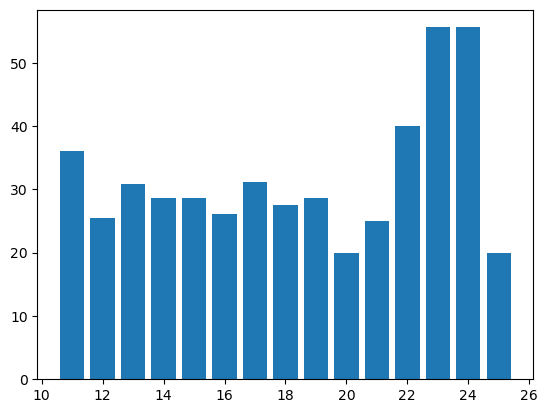

In [33]:
# 야근 Yes 직원의 데이터 분석
temp = df.reset_index()
over_yes = temp[temp['OverTime'] == 'Yes']
over_yes
# 시각화 (막대그래프, 연봉인상률 (X), 이직률 (y))
import matplotlib.pyplot as plt
plt.bar(over_yes['PercentSalaryHike'], over_yes['ratio'])
plt.show()
# 연봉인상률 20%까지는 이직률이 조금은 감소하는 듯 싶으나
# 21% 이상부터는 이직률이 증가 (핵심인재의 이탈)
# 연봉인상률이 높은 직원의 야근시간을 줄이는 것이 핵심인재의 이탈을 방지하는 요소

### 모델 선택 및 하이퍼 파라미터 조절
- 데이터 타입별로 구분 (숫자/문자)
- 문자형태의 데이터는 인코딩 (숫자형태로 변경)
- 데이터 정리(불필요한 컬럼 삭제)
- X,y 데이터 분리(문제, 정답)
- train, test 분리

In [34]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp,Role_Company,Role_Company_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,40대 이상,0.666667,0.6 초과
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,40대 이상,0.700000,0.6 초과
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,30-40,0.000000,0.3이하
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,30-40,0.875000,0.6 초과
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,30 이하,1.000000,0.6 초과
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,30-40,0.400000,0.3-0.6
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,30-40,1.000000,0.6 초과
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,30 이하,0.333333,0.3-0.6
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,40대 이상,0.666667,0.6 초과


In [35]:
# 데이터 타입에 따른 컬럼 분리
for i in data.columns:
    print(data[i].dtype, data[i].dtype == 'O')

int64 False
int32 False
object True
int64 False
object True
int64 False
int64 False
object True
int64 False
int64 False
int64 False
object True
int64 False
int64 False
int64 False
object True
int64 False
object True
int64 False
int64 False
int64 False
object True
object True
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
object True
float64 False
object True


In [36]:
# 숫자타입의 컬럼과 문자 타입의 컬럼을 각각 리스트에 저장
numeric_list = []
categorical_list = []

for i in data.columns:
    if data[i].dtype == 'O':
        categorical_list.append(i)
    else:
        numeric_list.append(i)

In [37]:
print(categorical_list)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_gp', 'Role_Company_gp']


In [38]:
numeric_list

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Role_Company']

In [39]:
# 모델링을 위한 데이터 분리
# 문제 (X), 정답 (y)
# 가설 확인을 위해 만들 컬럼들은 삭제
# axis = 1이 열찾기, axis = 0이 행 찾기
X = data.drop(['Attrition','Age_gp', 'Role_Company', 'Role_Company_gp'], axis = 1)
y = data['Attrition']

In [40]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [41]:
# 레이블 인코딩
# BusinessTravel : 출장빈도 -> Non-Travel, Travel_Rarely, Travel_Frequently
# 출장이 많을수록 이직률에 영향을 많이 미치지 않을까?
# 출장이 잦은 데이터에는 높은 숫자를 매칭

# 딕셔너리를 통해서 각 데이터에 숫자를 매칭
BT_dict = {'Non-Travel':0, 'Travel_Rarely' : 1, 'Travel_Frequently':2}

# map(): 값을 매핑해주는 함수 같은 키 값을 밸류로 변경
X['BusinessTravel'] = X['BusinessTravel'].map(BT_dict)

In [42]:
X['BusinessTravel']

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int64

In [43]:
# 나머지 컬럼은 원핫인코딩 진행!
X_one_hot = pd.get_dummies(X, dtype = int) # True, False를 숫자로 바꾸고 싶으면 dtype 써주기

In [44]:
# 데이터 분리 도구 불러오기
from sklearn.model_selection import train_test_split
# 데이터 순서가 중요, X가 아닌 X_one_hot 넣기
X_train, X_test,y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=1)

In [45]:
# 데이터 크기확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1029, 53)
(1029,)
(441, 53)
(441,)


### 모델링
- 모델 객체 생성
- 모델 학습
- 모델 평가

In [46]:
# 모델 객체 생성 LogisticRegression
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()

In [47]:
# 모델 학습
# 모델명.fit(학습용 문제, 학습용 정답)
logi_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# 평가
# 모델명.score(테스트용 문제, 테스트용 정답)
logi_model.score(X_test,y_test)
# 정확도 accuracy

0.8253968253968254

### 교차검증
- 모델의 일반화 성능평가
- 일반화 성능 측정방법 : 모델이 데이터에 대해 얼마나 잘 맞추는지 한번에 평가하는 것보다 여러번 나누어 평가하는 것이 신뢰성이 높다.
- 방법 : (훈련용 데이터 내에서) 훈련세트와 테스트세트로 나누어 여러겹 학습 및 평가
- 최종 평가전에 평균 정확도 확인
- 평균적인 성능을 확인하면, 한번 평가하는 것보다 일반화에 대한 판단을 할 수 있다.
- 과대적합인지 아닌지를 확인하는 과정임! 과대적합을 제어하는 것이 아님!
- 일반화(어떤 데이터셋이 들어와도 평균적인 성능을 보임) 정도를 확인
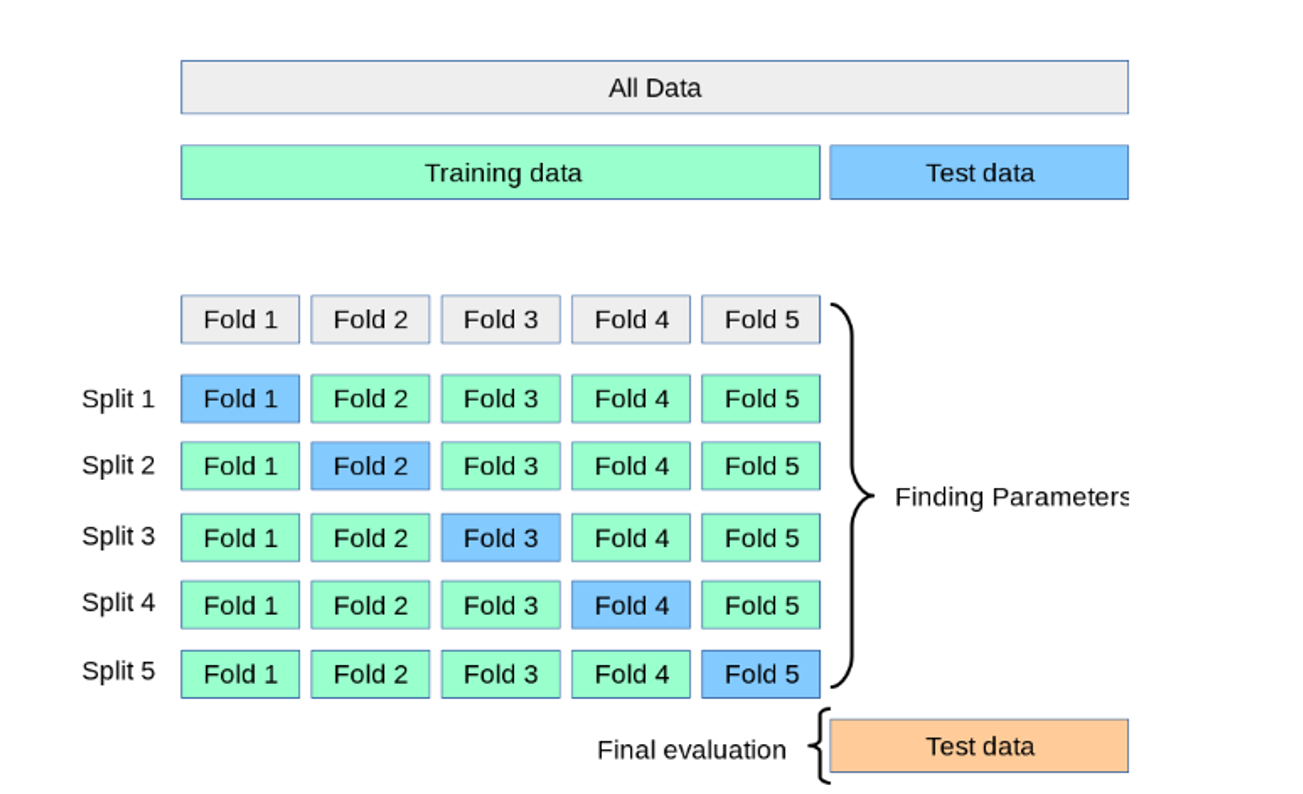

In [50]:
# 교차검증
from sklearn.model_selection import cross_val_score # 교차검증도구
# cross_val_score(모델명, 학습용문제, 학습용 정답, cv = 5)
result = cross_val_score(logi_model,X_train, y_train, cv = 5)
result.mean()

0.8454842529007814

- Support Vector Machine (SVM)

In [54]:
from sklearn.svm import LinearSVC # C로 끝나면 분류모델 ,R로 끝나면 회귀모델
#모델 객체생성
model1 = LinearSVC()

In [56]:
# 모델 학습
# model.fit(학습용문제, 학습용 정답)
model1.fit(X_train, y_train)

LinearSVC()

In [58]:
# 모델 평가
# model.score(테스트용 문제, 테스트용 정답)
model1.score(X_test, y_test)
# 분류평가지표: 정확도 accuracy -> 0 ~ 1 -> 1에 가까울수록 정답을 잘 맞추는 모델

0.8049886621315193

In [61]:
# 교차검증
from sklearn.model_selection import cross_val_score # 교차검증도구
# cross_val_score(모델명, 학습용문제, 학습용 정답, cv = 5)
result = cross_val_score(model1,X_train, y_train, cv = 5)
result.mean()

0.8445086431446839

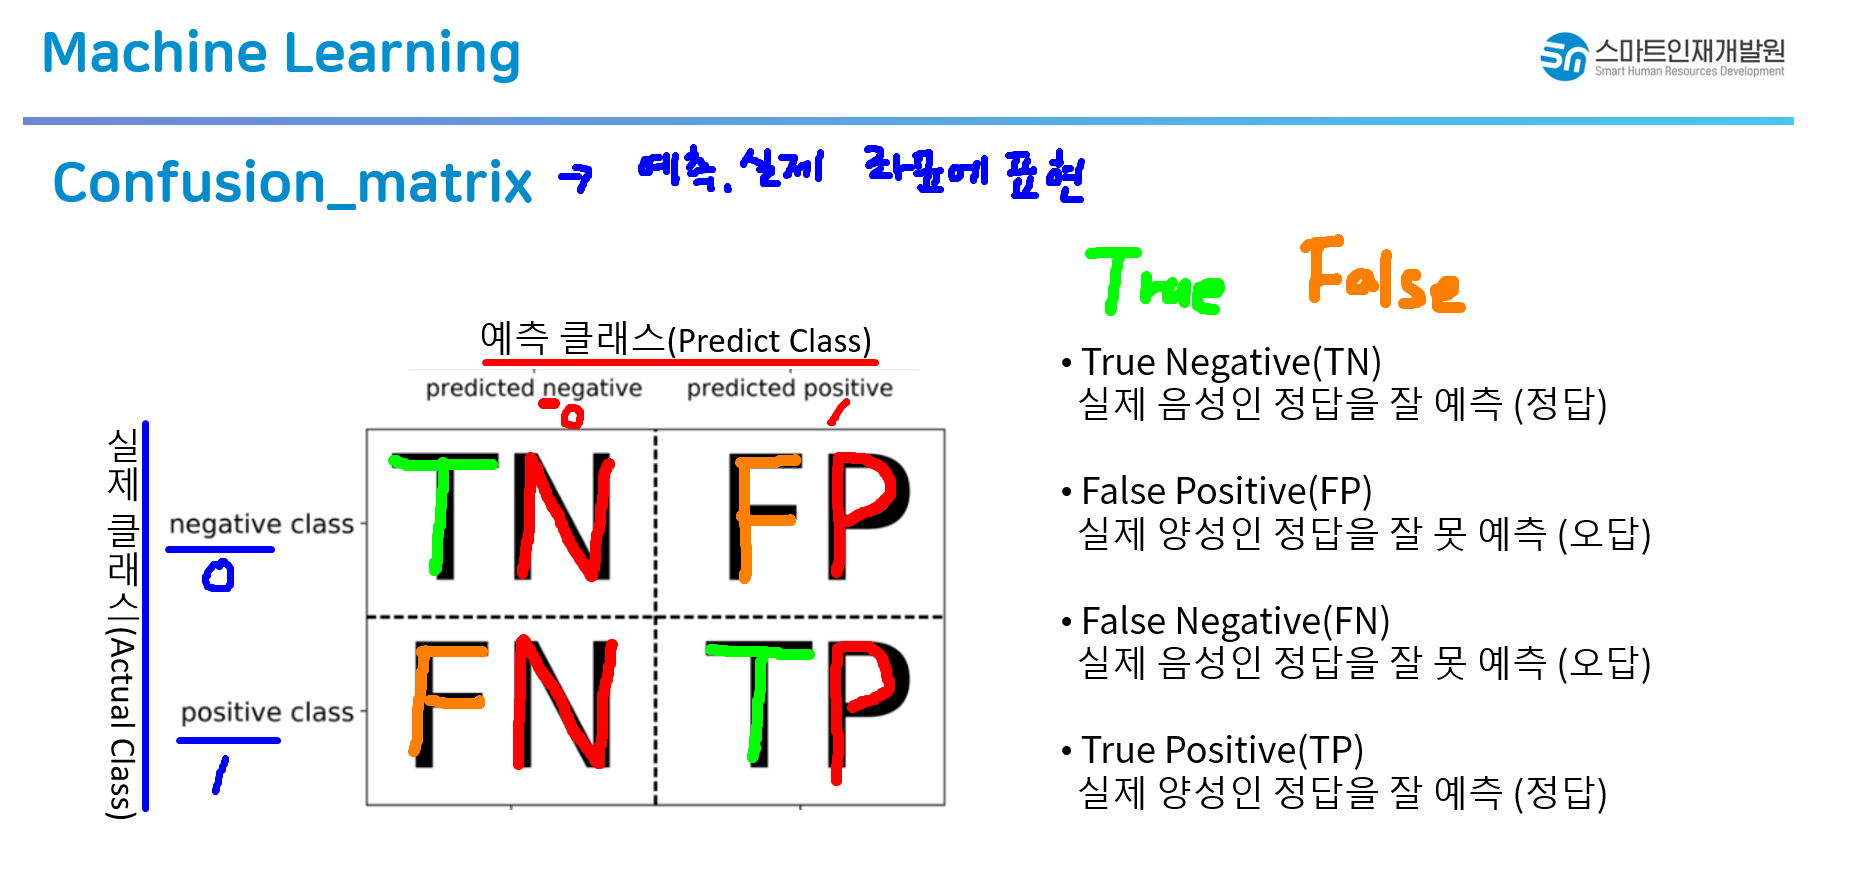

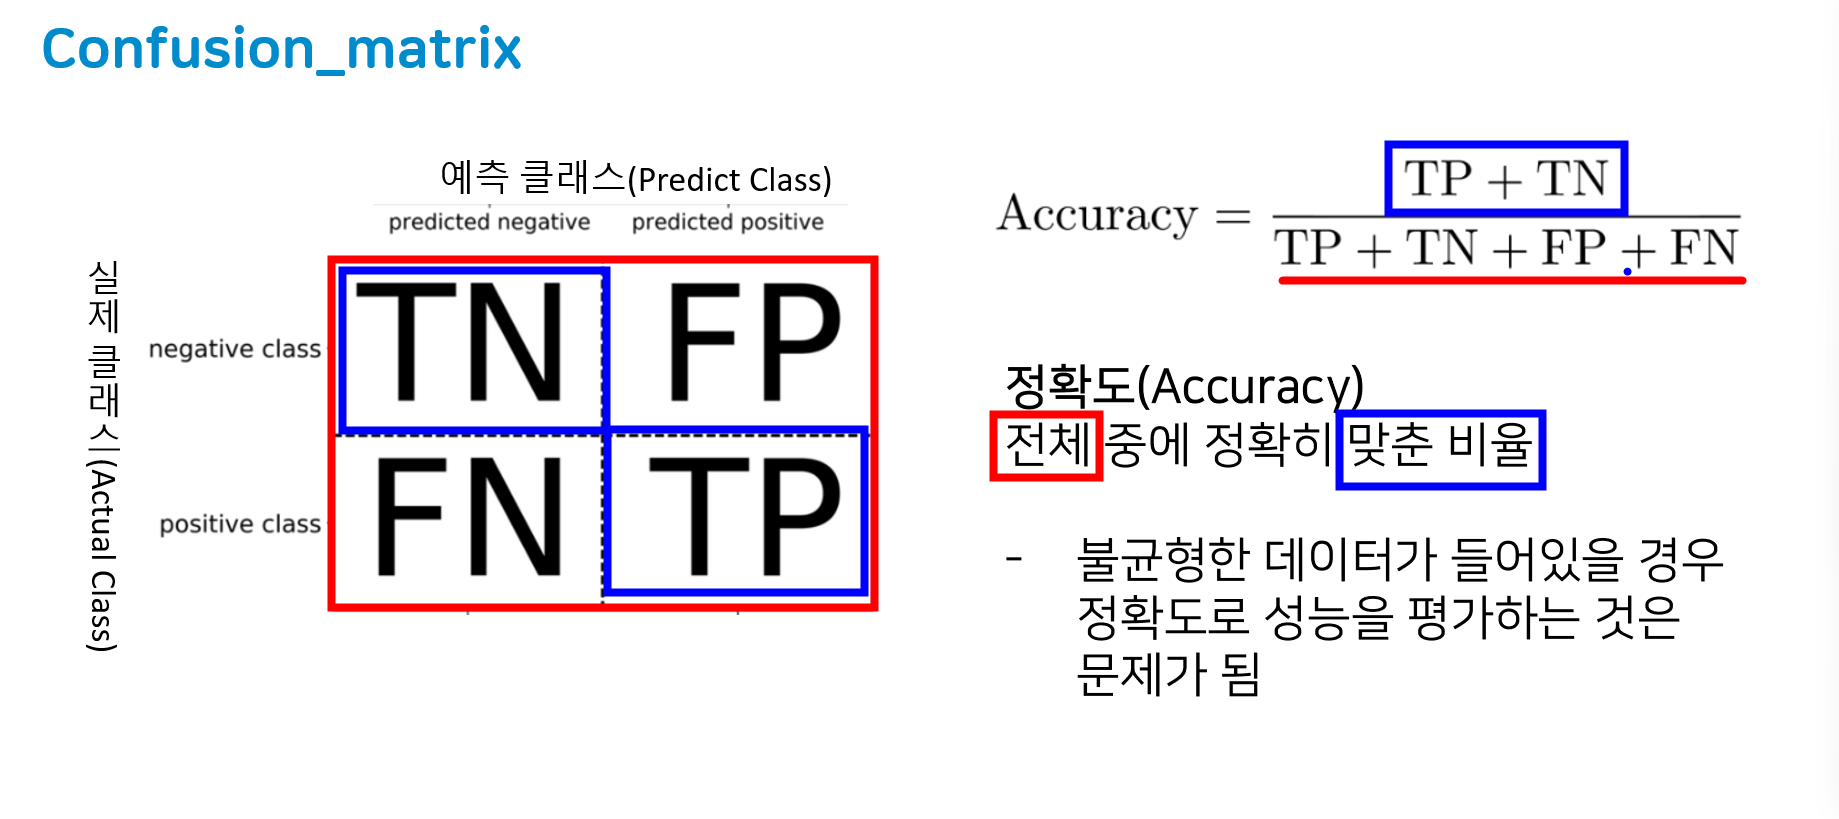


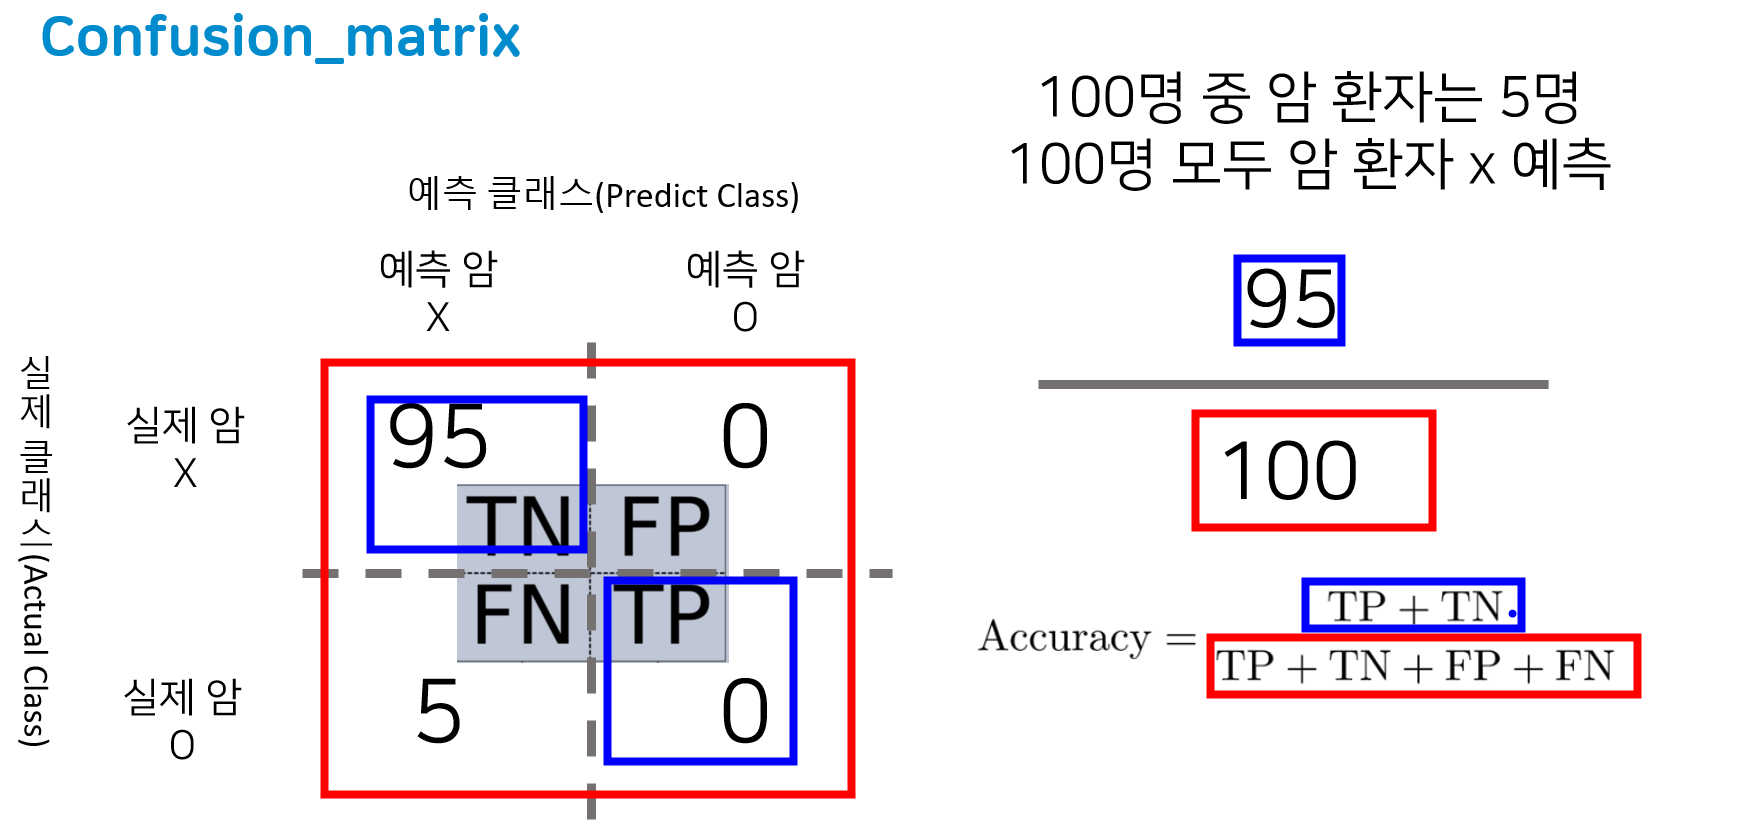

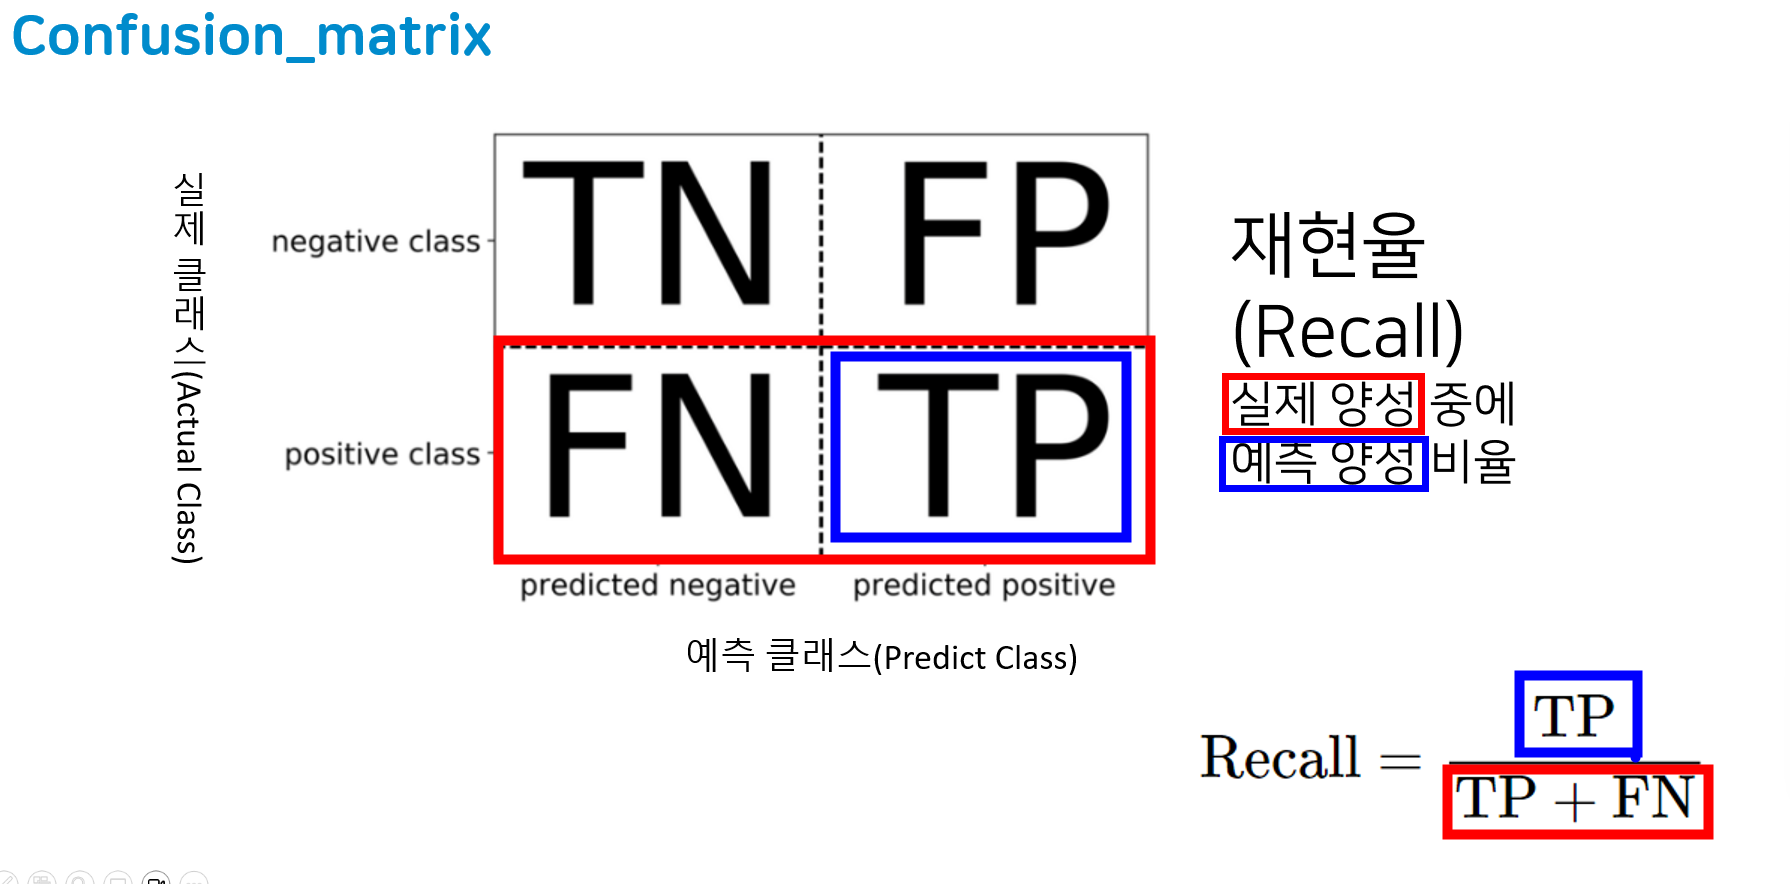